<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Extraccion_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de características

## Análisis de la componente principal (PCA)
El análisis de la componente principal, o PCA por sus siglas en inglés, es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos. PCA nos permite simplificar la información presente en un conjunto de datos con múltiples variables y transformarla en un conjunto de datos reducido, pero que todavía retiene gran parte de la información original.

El objetivo del PCA es encontrar una representación de los datos que sea más fácil de entender y que conserve la mayor cantidad posible de la varianza en los datos.

Para llevar a cabo un análisis PCA primero se calcula la matriz de covarianza de los datos originales. A continuación, se calculan los vectores propios de esta matriz, que nos indican las direcciones en las que los datos tienen la mayor varianza. Luego, se proyectan los datos originales en estas direcciones y se obtiene un nuevo conjunto de datos con menos variables que aún captura gran parte de la información original.


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
# Cargamos los datos
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
# Y mostramos algunas variables por pantalla
print(df.head())
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [3]:
"""
Utilizaremos scikit-learn para aplicar la técnica de preprocesamiento StandardScaler.
El objetivo es transformar los datos para que tengan una media cero y una desviación
estándar unitaria.
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales.
scaler.fit(df.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales. El resultado de esta transformación
# se almacena en la variable "X_scaled"
X_scaled = scaler.transform(df.values)
print("X_scaled:\n", X_scaled)

X_scaled:
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [4]:
# Vamos a utilizar las funciones de Sci-kit learn para análisis PCA
from sklearn.decomposition import PCA
# Para evaluar los resultados, utilizaremos el conjunto completo de variables
# "n_components" = 30 especifica que el PCA se ha de ajustar a los datos para encontrar
# las 30 componentes principales.
pca = PCA(n_components=30, random_state=2020)
pca.fit(X_scaled)

# Almacenamos en la variable X_pca los valores de los (30) componentes principales
X_pca = pca.transform(X_scaled)
print("X_pca:\n", X_pca)

# Puesto que seleccionamos el conjunto completo de variables las componenete
# seleccionadas deben dar cuenta del 100% de la varianza en los datos
print("\n => Varianza explicada por las componentes:", sum(pca.explained_variance_ratio_ * 100))

X_pca:
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]

 => Varianza explicada por las componentes: 100.00000000000001


Text(0, 0.5, 'Porcentaje de varianza explicado')

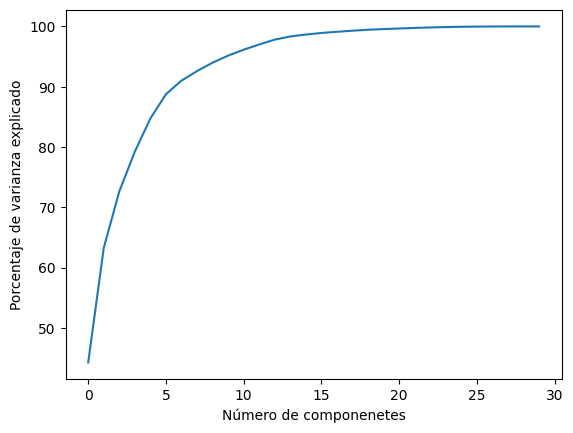

In [5]:
# Si representamos la varianza en función del número de componentes podemos observar
# cuál es el mínimo número de componenetes que necesitaremos para explicar un cierto
# porcentaje de la varianza
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componenetes")
plt.ylabel("Porcentaje de varianza explicado")

In [6]:
# Vemos que con solo un tercio de las variables podemos explicar el 95% de la variaza
n_var = np.cumsum(pca.explained_variance_ratio_ * 100)[9]
print("Varianza 10 primeras componenetes:", n_var)

Varianza 10 primeras componenetes: 95.15688143366668


<Axes: >

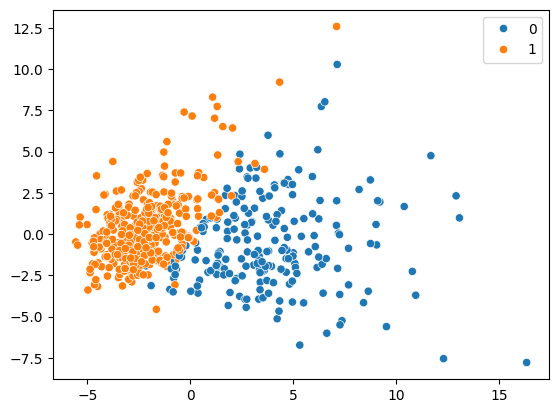

In [7]:
# Alternativamente, podemos construir el conjunto que acomode el 95% de la variaza
# del siguiente modo
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

# Una buena práctica es visualizar la relación de las principales componentes
import seaborn as sns
sns.scatterplot(x=X_pca_95[:, 0], y=X_pca_95[:, 1], hue=cancer_data.target)


## Descripción del gráfico de las componentes principales

1. **Reducción de Dimensionalidad**: PCA es una técnica de reducción de dimensionalidad que transforma las variables originales en un nuevo conjunto de variables (componentes principales) que son ortogonales (no correlacionadas) entre sí. Estos componentes principales capturan la mayor parte de la variabilidad presente en los datos originales.

2. **Visualización de Componentes Principales**: Al graficar los dos primeros componentes principales (`X_pca_95[:, 0]` y `X_pca_95[:, 1]`), este gráfico muestra la dispersión de los datos en las dos direcciones que capturan la mayor variabilidad. Cada punto en el gráfico representa una observación en este espacio de componentes reducido.

3. **Interpretación de los Ejes**: Los ejes del gráfico (eje x y eje y) no tienen un significado inherente en términos de las variables originales, ya que cada componente principal es una combinación lineal de ellas. Sin embargo, la posición relativa de los puntos puede indicar patrones y relaciones entre las muestras.

Este tipo de gráfico es útil para explorar visualmente la estructura de los datos. Por ejemplo, si los puntos de diferentes categorías se separan claramente, esto sugiere que los dos primeros componentes principales son buenos para distinguir entre estas categorías. Por otro lado, si hay mucha superposición, puede indicar que se necesita más información (más componentes o diferentes técnicas) para diferenciar las clases efectivamente.

In [8]:
# Finalmente podemos crear un nuevo marco de datos con el resultado del análisis PCA
cols = ['PCA' + str(i) for i in range(10)]
df_pca = pd.DataFrame(X_pca_95, columns=cols)
print("Datos (PCA - 95%):\n", df_pca)


Datos (PCA - 95%):
           PCA0       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

         PCA7      PCA8      PC

In [9]:
# Obtener la matriz de componentes
componentes = pca.components_

# Crear un DataFrame con las cargas de los componentes
df_cargas = pd.DataFrame(componentes.T, columns=['PC'+str(i+1) for i in range(componentes.shape[0])], index=df.columns)

# Mostrar las cargas
print(df_cargas)

# Para cada componente principal, encontrar la variable original con mayor influencia
for i in range(componentes.shape[0]):
    pc = f'PC{i+1}'
    variable_mas_importante = df_cargas[pc].abs().idxmax()
    print(f"{pc}: {variable_mas_importante}")

                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531  0.041409  0.037786   
mean texture             0.103725 -0.059706  0.064550 -0.603050 -0.049469   
mean perimeter           0.227537 -0.215181 -0.009314  0.041983  0.037375   
mean area                0.220995 -0.231077  0.028700  0.053434  0.010331   
mean smoothness          0.142590  0.186113 -0.104292  0.159383 -0.365089   
mean compactness         0.239285  0.151892 -0.074092  0.031795  0.011704   
mean concavity           0.258400  0.060165  0.002734  0.019123  0.086375   
mean concave points      0.260854 -0.034768 -0.025564  0.065336 -0.043861   
mean symmetry            0.138167  0.190349 -0.040240  0.067125 -0.305941   
mean fractal dimension   0.064363  0.366575 -0.022574  0.048587 -0.044424   
radius error             0.205979 -0.105552  0.268481  0.097941 -0.154456   
texture error            0.017428  0.089980  0.374634 -0.359856 -0.191651   

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el conjunto de datos de ejemplo (iris)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Aplicar SelectKBest
k = 3  # Seleccionar las 3 mejores características
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_feature_indices = selector.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selected_feature_indices].tolist()

print("Características seleccionadas:", selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
X_selected = pd.DataFrame(X_new, columns=selected_features)

print("\nDatos con características seleccionadas:")
print(X_selected.head())

# Obtener las puntuaciones de todas las características
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values('Score', ascending=False)

print("\nPuntuaciones de todas las características:")
print(feature_scores)

Características seleccionadas: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

Datos con características seleccionadas:
   sepal length (cm)  petal length (cm)  petal width (cm)
0                5.1                1.4               0.2
1                4.9                1.4               0.2
2                4.7                1.3               0.2
3                4.6                1.5               0.2
4                5.0                1.4               0.2

Puntuaciones de todas las características:
             Feature        Score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040


## Análisis de Componentes Independientes (ICA)

In [11]:
# Utilizaremos datos de fMRI para nuestro ejemplo con ICA
# Para ello, comenzamos instalando la librería nilearn
!python -m pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 20.9 MB/s eta 0:00:00


In [12]:
from nilearn import datasets
# Descargamos un sujeto del estudio con RM funcional
dataset = datasets.fetch_development_fmri(n_subjects=1)
file_name = dataset.func[0]

# Preprocesado de la imagen
from nilearn.input_data import NiftiMasker

# Aplicamos una máscara para extraer el fondo de la imagen (vóxeles no cerebrales)
masker = NiftiMasker(smoothing_fwhm=8, memory='nilearn_cache', memory_level=1,
                     mask_strategy='epi', standardize=True)
data_masked = masker.fit_transform(file_name)


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/development_fmri


Added README.md to /root/nilearn_data/development_fmri


Dataset created in /root/nilearn_data/development_fmri/development_fmri



 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


In [13]:
from sklearn.decomposition import FastICA
import numpy as np
# Seleccionamos 10 componentes
ica = FastICA(n_components=10, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T
# Aplicamos un corte (80% señal) en los datos después de normalizar según
# la media y desviación estándar de los datos
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
components_masked[np.abs(components_masked) < .8] = 0
# Invertimos la transformación para recuperar la estructura 3D
component_img = masker.inverse_transform(components_masked)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


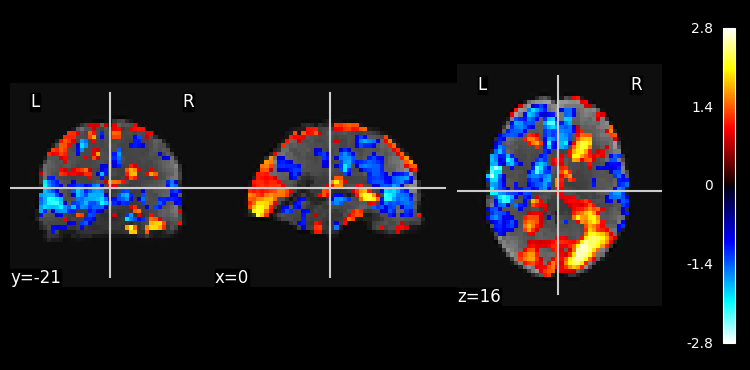

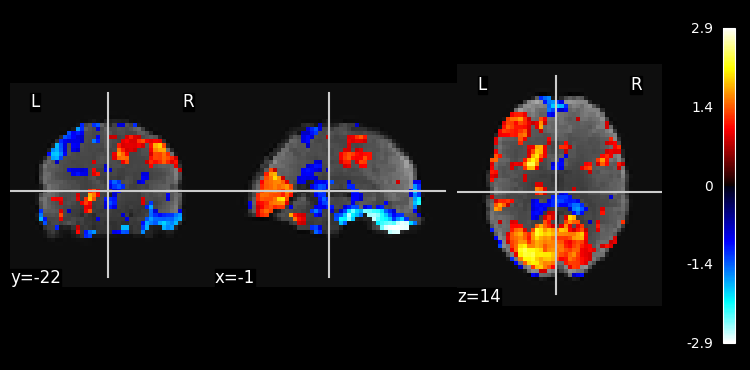

In [14]:
# Finalmete, visualizamos el resultado de las operaciones de reducción
from nilearn import image
from nilearn.plotting import plot_stat_map, show
from nilearn import datasets

# Datos de un sujeto/paciente
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]

mean_img = image.mean_img(func_filename)
plot_stat_map(image.index_img(component_img, 0), mean_img)
plot_stat_map(image.index_img(component_img, 1), mean_img)